In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 166)

In [2]:
df = pd.read_csv(r'Leads.csv')

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

<Axes: xlabel='Lead Quality'>

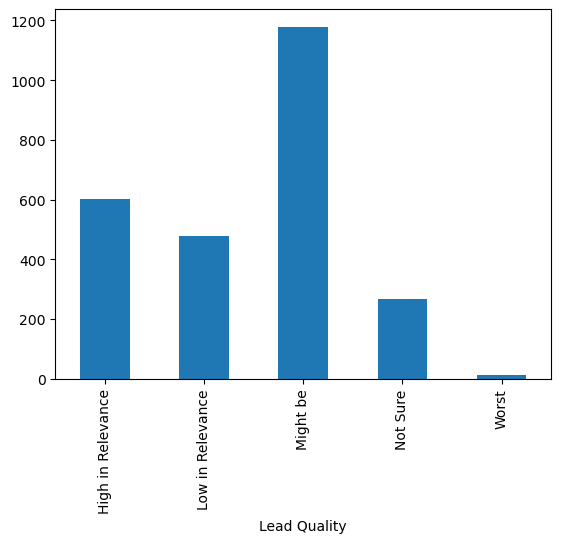

In [7]:
df.groupby('Lead Quality')['Converted'].sum().plot.bar()

In [8]:
df.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
df = df.replace('Select',np.nan)

In [10]:
round(df.isna().sum()/df.shape[0]*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
df['Lead Profile'].value_counts()

Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [12]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [13]:
len(object_columns)

30

In [14]:
df[object_columns].isna().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About O

In [15]:
numeric_columns = df.select_dtypes(include='number').columns
numeric_columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [16]:
len(numeric_columns)

7

In [17]:
df[numeric_columns].isna().sum()

Lead Number                       0
Converted                         0
TotalVisits                     137
Total Time Spent on Website       0
Page Views Per Visit            137
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

In [18]:
df['How did you hear about X Education'].value_counts()

How did you hear about X Education
Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: count, dtype: int64

In [19]:
df['How did you hear about X Education'].isna().sum()

7250

<Axes: xlabel='How did you hear about X Education'>

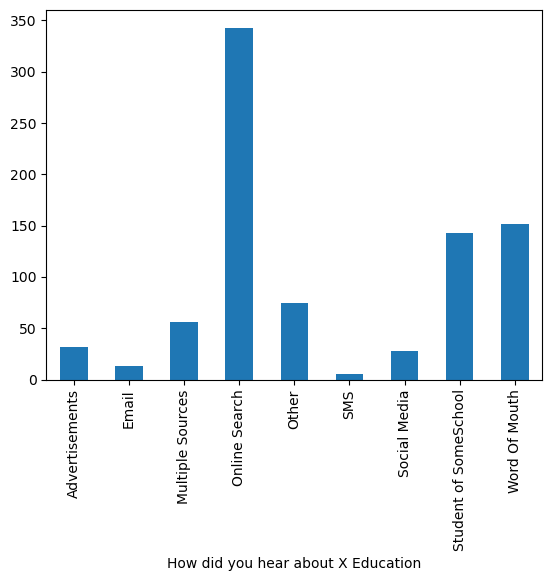

In [20]:
df.groupby('How did you hear about X Education')['Converted'].sum().plot.bar()

<Axes: xlabel='How did you hear about X Education'>

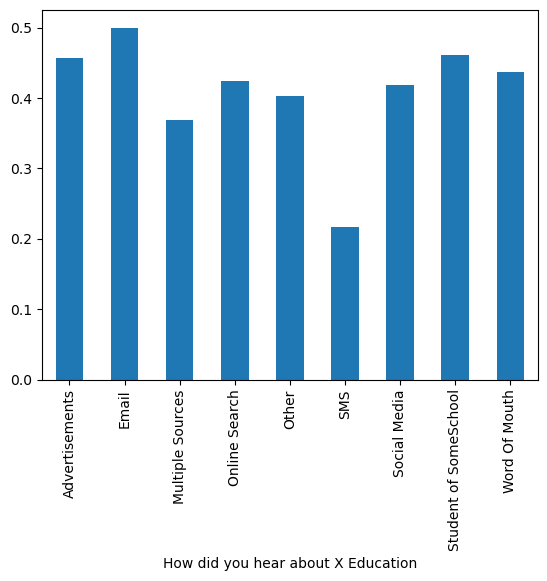

In [21]:
df.groupby('How did you hear about X Education')['Converted'].mean().plot.bar()

In [22]:
df.corr(numeric_only=True)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
Lead Number,1.000000,0.025157,0.022223,0.020329,0.058808,-0.067982,-0.129124
Converted,0.025157,1.000000,0.030395,0.362483,-0.003328,0.167962,0.218571
TotalVisits,0.022223,0.030395,1.000000,0.221240,0.512125,-0.058514,0.130887
Total Time Spent on Website,0.020329,0.362483,0.221240,1.000000,0.320361,-0.065287,0.175589
Page Views Per Visit,0.058808,-0.003328,0.512125,0.320361,1.000000,-0.162892,0.161254
Asymmetrique Activity Score,-0.067982,0.167962,-0.058514,-0.065287,-0.162892,1.000000,-0.123250
Asymmetrique Profile Score,-0.129124,0.218571,0.130887,0.175589,0.161254,-0.123250,1.000000


<Axes: >

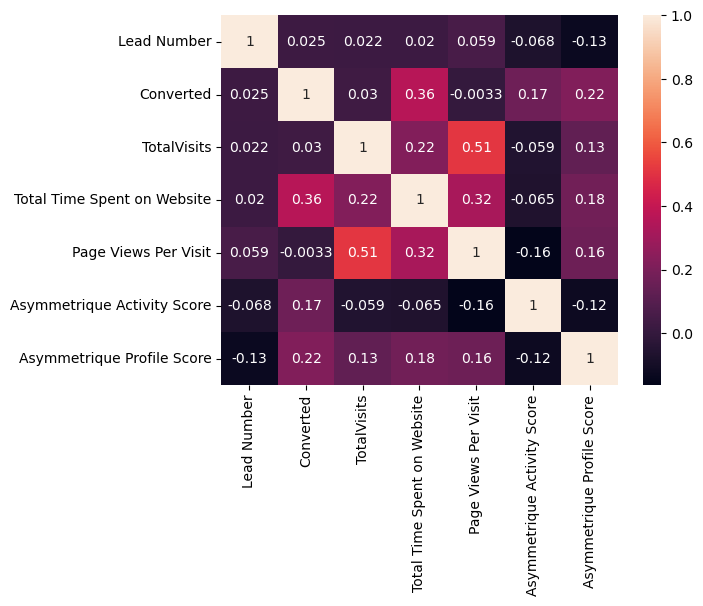

In [23]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [24]:
df['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64

<Axes: xlabel='Lead Origin'>

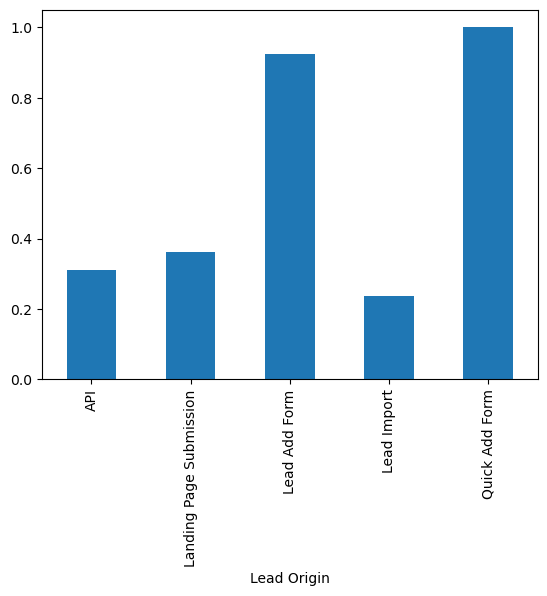

In [25]:
df.groupby('Lead Origin')['Converted'].mean().plot.bar()

In [26]:
df['Lead Source'].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

<Axes: xlabel='Lead Source'>

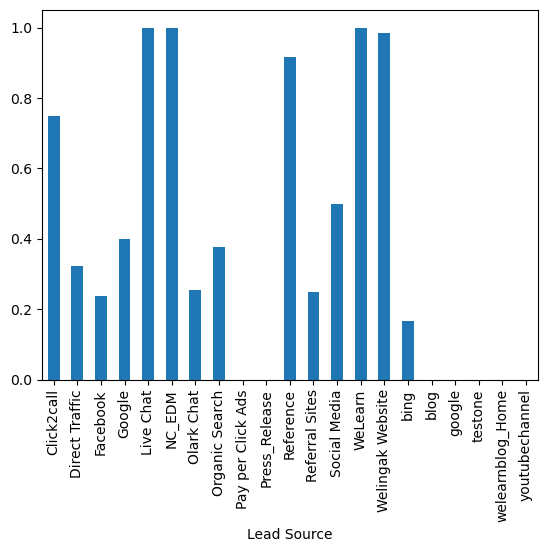

In [27]:
df.groupby('Lead Source')['Converted'].mean().plot.bar()

In [28]:
df['Do Not Email'].value_counts()

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64

<Axes: xlabel='Do Not Email'>

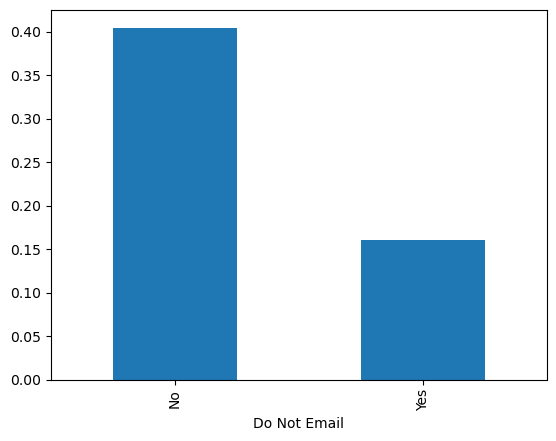

In [29]:
df.groupby('Do Not Email')['Converted'].mean().plot.bar()

In [30]:
df['Do Not Call'].value_counts()

Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

<Axes: xlabel='Do Not Call'>

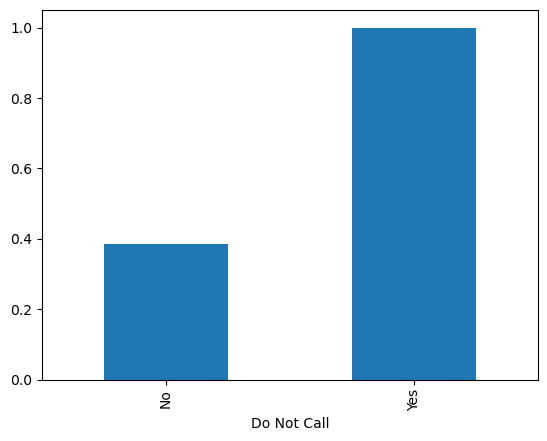

In [31]:
df.groupby('Do Not Call')['Converted'].mean().plot.bar()

In [32]:
df.Converted.value_counts()/df.shape[0]*100

Converted
0    61.461039
1    38.538961
Name: count, dtype: float64

In [33]:
df['Asymmetrique Activity Score'].value_counts()

Asymmetrique Activity Score
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: count, dtype: int64

In [34]:
df['Asymmetrique Activity Score'].isna().sum()/df.shape[0]*100

45.64935064935065

In [35]:
df['City'].value_counts()

City
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [36]:
df['Tags'].value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

## Removed columns with more than 45% of null values

In [37]:
df1 = df.loc[:, df.isnull().mean() < 0.45]
df1.shape

(9240, 30)

In [38]:
df.shape

(9240, 37)

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [40]:
df1.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [41]:
df1['Lead Source'] = df1['Lead Source'].fillna(df1['Lead Source'].mode()[0])

In [42]:
df1['TotalVisits'] = df1['TotalVisits'].fillna(df1['TotalVisits'].mean())

In [43]:
df1['Page Views Per Visit'] = df1['Page Views Per Visit'].fillna(df1['Page Views Per Visit'].mean())

In [44]:
df1['Last Activity'] = df1['Last Activity'].fillna(df1['Last Activity'].mode()[0])

In [45]:
df1['Country'] = df1['Country'].fillna(df1['Country'].mode()[0])

In [46]:
df1['Specialization'] = df1['Specialization'].fillna(df1['Specialization'].mode()[0])

In [47]:
df1['What is your current occupation'] = df1['What is your current occupation'].fillna(df1['What is your current occupation'].mode()[0])

In [48]:
df1['What matters most to you in choosing a course'] = df1['What matters most to you in choosing a course'].fillna(df1['What matters most to you in choosing a course'].mode()[0])

In [49]:
df1['Tags'] = df1['Tags'].fillna(df1['Tags'].mode()[0])

In [50]:
df1['City'] = df1['City'].fillna(df1['City'].mode()[0])

In [51]:
df1.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [52]:
df1 = df1.replace('No',0).replace('Yes',1)

In [53]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


In [54]:
df1['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [55]:
df1.shape

(9240, 28)

In [56]:
df1.duplicated().sum()

1706

In [57]:
df1.drop_duplicates(inplace=True)

In [58]:
df1.shape

(7534, 28)

In [59]:
len(df1.select_dtypes(include='number').columns)

18

In [60]:
df1.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Magazine'],axis=1, inplace=True)

In [61]:
df1.corr(numeric_only=True)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
Do Not Email,1.000000,-0.005070,-0.156922,0.011615,-0.087551,-0.003044,-0.013425,-0.005070,-0.003585,-0.003585,-0.007171,-0.009489,0.037789
Do Not Call,-0.005070,1.000000,0.020290,0.000897,0.004254,-0.011242,-0.000703,-0.000266,-0.000188,-0.000188,-0.000376,-0.000497,-0.012840
Converted,-0.156922,0.020290,1.000000,0.023608,0.425706,-0.024138,-0.003088,0.003602,-0.009253,-0.009253,-0.006708,0.020125,-0.057362
TotalVisits,0.011615,0.000897,0.023608,1.000000,0.087976,0.417156,0.045975,0.033365,0.036218,0.013260,0.021934,0.031626,0.104342
Total Time Spent on Website,-0.087551,0.004254,0.425706,0.087976,1.000000,0.123429,0.005354,0.009249,0.004538,0.025455,0.003795,0.019508,0.039086
Page Views Per Visit,-0.003044,-0.011242,-0.024138,0.417156,0.123429,1.000000,0.027658,0.022968,-0.002257,0.002467,0.019678,0.015222,0.135003
Search,-0.013425,-0.000703,-0.003088,0.045975,0.005354,0.027658,1.000000,0.188480,0.267031,-0.000497,0.132796,0.302153,-0.008640
Newspaper Article,-0.005070,-0.000266,0.003602,0.033365,0.009249,0.022968,0.188480,1.000000,0.707060,-0.000188,0.353319,0.266924,0.003920
X Education Forums,-0.003585,-0.000188,-0.009253,0.036218,0.004538,-0.002257,0.267031,0.707060,1.000000,-0.000133,0.499900,0.377814,0.014622
Newspaper,-0.003585,-0.000188,-0.009253,0.013260,0.025455,0.002467,-0.000497,-0.000188,-0.000133,1.000000,-0.000266,-0.000351,-0.009079


<Axes: >

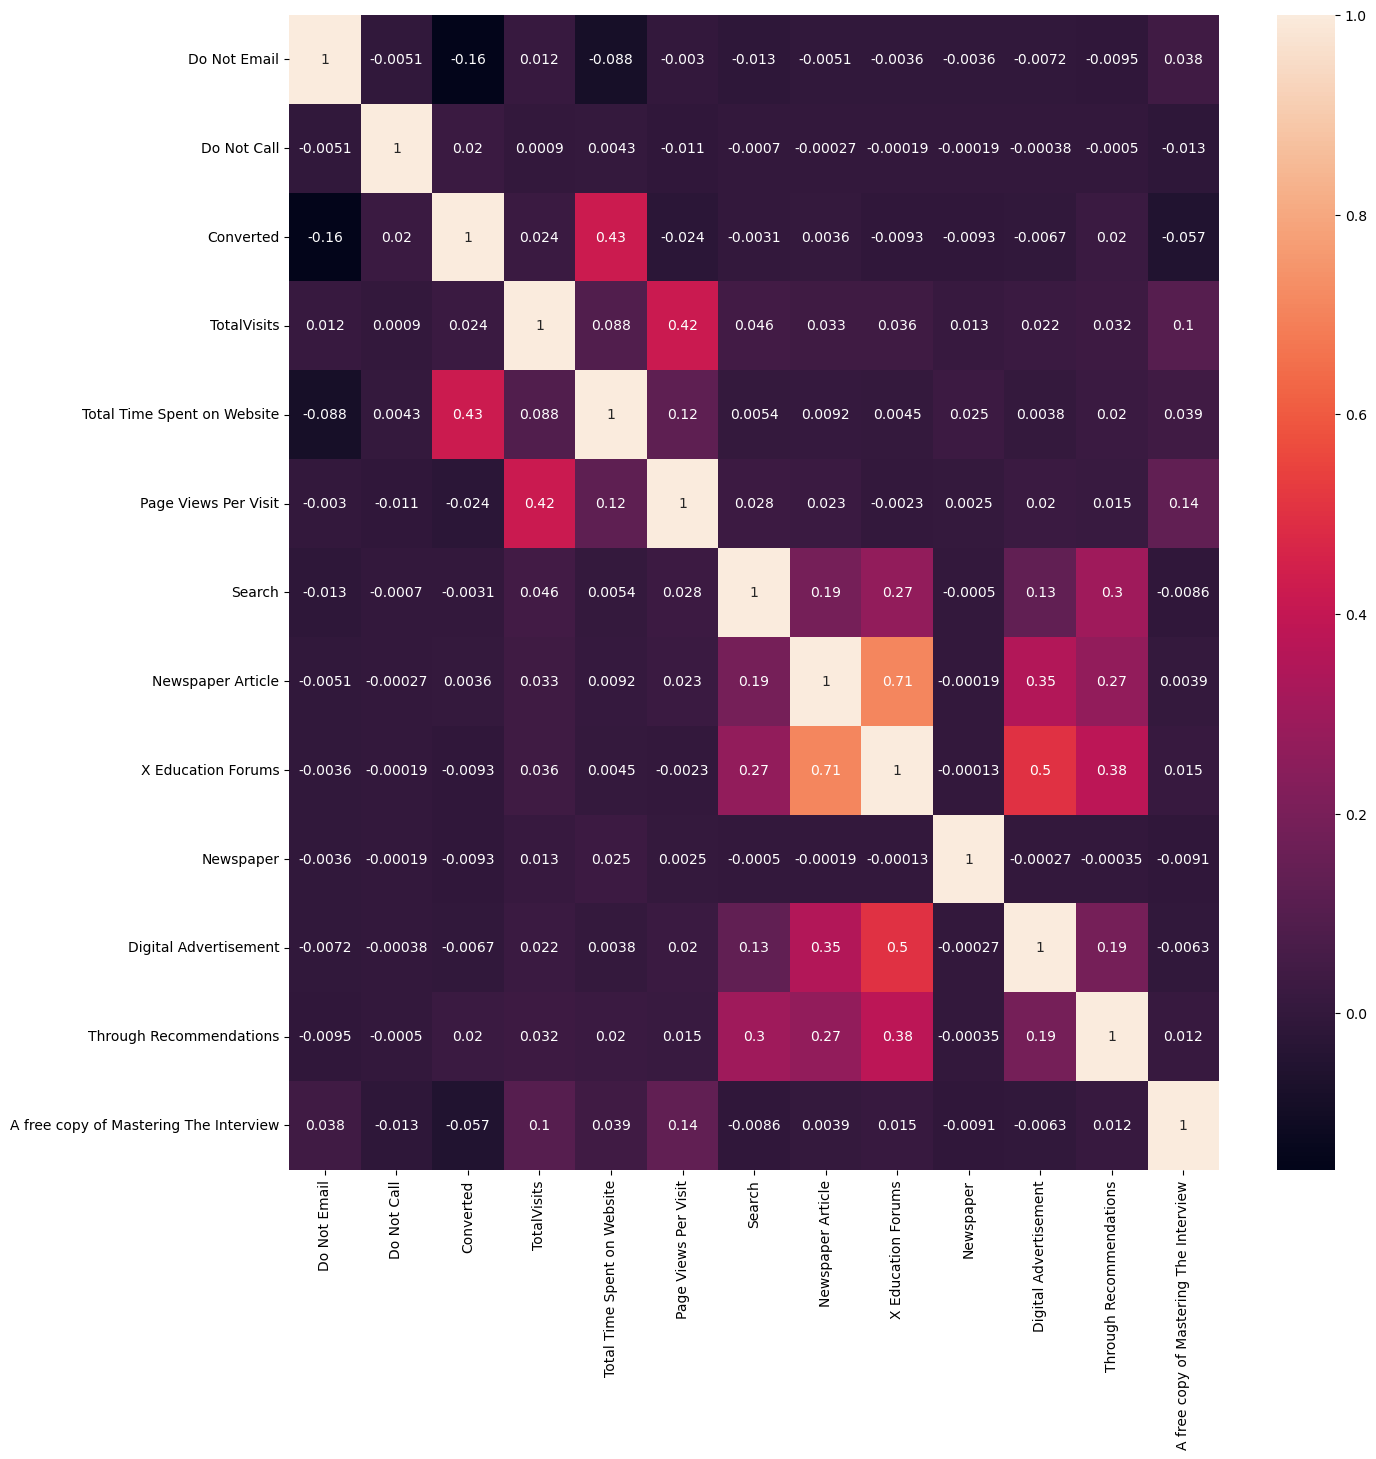

In [62]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(numeric_only=True),annot=True)

## Dummy Variable

In [63]:
df1.select_dtypes(include='object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [64]:
df_dummy = pd.get_dummies(df1,columns=df1.select_dtypes(include='object').columns,drop_first=True)
df_dummy.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_H

In [65]:
df_dummy.shape

(7534, 159)

In [66]:
df_dummy = df_dummy.replace(False,0).replace(True,1)

In [67]:
df_dummy.select_dtypes(include='number').columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       ...
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=159)

In [68]:
df_dummy.Converted.value_counts()/df_dummy.shape[0]*100

Converted
0    60.79108
1    39.20892
Name: count, dtype: float64

### Decently Balance Dataset

# Modeling

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve, auc

In [70]:
X = df_dummy.drop('Converted',axis=1)
y = df_dummy['Converted']

In [71]:
X.shape, y.shape

((7534, 158), (7534,))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=1)

In [73]:
model = LogisticRegression()

In [74]:
model.fit(X_train, y_train)

LogisticRegression()

In [75]:
y_pred = model.predict(X_test)

In [76]:
print('The accuracy of the model is',accuracy_score(y_test, y_pred)*100)

The accuracy of the model is 86.94267515923568


In [77]:
confusion_matrix(y_test,y_pred)

array([[1047,   94],
       [ 152,  591]], dtype=int64)

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

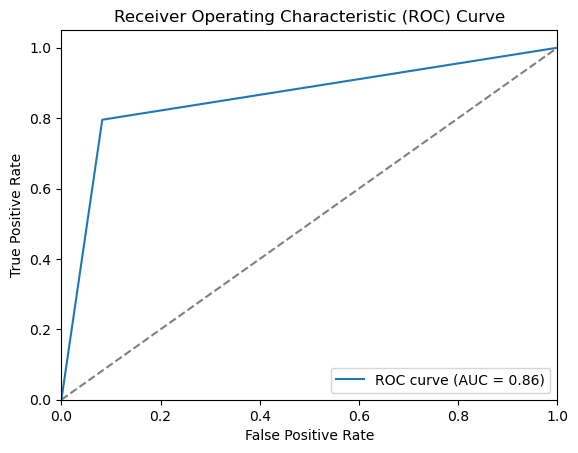

In [79]:
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()